In [2]:
import seaborn as sns

/n/home11/rkapoor/.conda/envs/rishabh/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [1]:
from pathlib import Path
import sys
import matplotlib.pyplot as plt

import matplotlib.font_manager
from matplotlib.font_manager import FontProperties

import matplotlib as mpl
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
fpath = Path(mpl.get_data_path(), "/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf")
from matplotlib.font_manager import FontProperties
from matplotlib import font_manager
plt.rcParams['figure.dpi'] = 300
font_path = "/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf"
font_manager.fontManager.addfont("/n/holylabs/LABS/extavour_lab/Users/rkapoor/envs/plot/fonts/arial.ttf")
prop = font_manager.FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = prop.get_name()
import numpy as np

In [3]:
from Bio import SeqIO
import pandas as pd
import numpy as np

def read_fasta(file_path):
    """Read sequences from a FASTA file and return a dictionary of sequences."""
    sequences = {}
    for record in SeqIO.parse(file_path, "fasta"):
        sequences[record.id] = str(record.seq)
    return sequences

def compute_similarity(seq1, seq2):
    """Compute the similarity between two nucleotide sequences."""
 
    min_length = min(len(seq1), len(seq2))
    seq1 = seq1[:min_length]
    seq2 = seq2[:min_length]
    
    matches = sum(1 for a, b in zip(seq1, seq2) if a == b)
    return matches / min_length  # Return similarity as a fraction

def create_similarity_dataframe(sequences):

    ids = list(sequences.keys())
    num_sequences = len(ids)
    
    # Initialize a DataFrame with zeros
    similarity_matrix = pd.DataFrame(np.ones((num_sequences, num_sequences)), index=ids, columns=ids)
    
    # Fill in the similarity matrix
    for i in range(num_sequences):
        for j in range(i + 1, num_sequences):
            id1, id2 = ids[i], ids[j]
            similarity = compute_similarity(sequences[id1], sequences[id2])
            similarity_matrix.at[id1, id2] = similarity
            similarity_matrix.at[id2, id1] = similarity
    
    return similarity_matrix


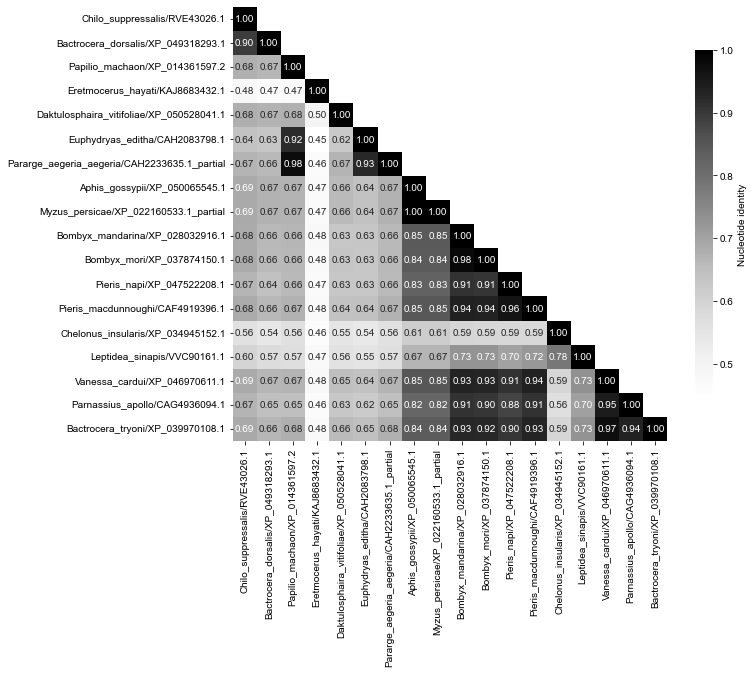

In [4]:
a=["Chilo_suppressalis/RVE43026.1","Bactrocera_dorsalis/XP_049318293.1","Papilio machaon/XP 014361597.2", "Eretmocerus_hayati/KAJ8683432.1","Daktulosphaira_vitifoliae/XP_050528041.1", "Euphydryas editha/CAH2083798.1","Pararge aegeria aegeria/CAH2233635.1 partial", "Aphis gossypii/XP 050065545.1","Myzus persicae/XP 022160533.1 partial", "Bombyx mandarina/XP 028032916.1", "Bombyx mori/XP 037874150.1","Pieris napi/XP 047522208.1","Pieris macdunnoughi/CAF4919396.1","Chelonus insularis/XP 034945152.1", "Leptidea sinapis/VVC90161.1","Vanessa cardui/XP 046970611.1", "Parnassius apollo/CAG4936094.1","Bactrocera tryoni/XP 039970108.1"]
file_path = "patchy_distribution/cluster2/trimmedpal2nal_nuc.fasta"
sequences = read_fasta(file_path)
similarity_df = create_similarity_dataframe(sequences)
similarity_df=similarity_df.loc[[x.replace(" ","_") for x in a],[x.replace(" ","_") for x in a]]
mask = np.triu(np.ones_like(similarity_df, dtype=bool), k=1)

plt.figure(figsize=(10, 8))
ax = sns.heatmap(similarity_df, mask=mask, cmap='Greys', fmt=".2f", square=True, annot=True, cbar_kws={"shrink": .8, "label": 'Nucleotide identity'})
colorbar = ax.collections[0].colorbar


plt.savefig('patchy_cluster2_nucleotide_identity.svg',format='svg',bbox_inches='tight')
